In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import public packages and functions
import os
import pandas as pd
import numpy as np
import sys
import json
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')

#import utils scripts
import utils_accelerometer, utils_misc, utils_psd, utils_plotting_psd

from lib_LFP import LFP
from lib_event import EVENTS
from lib_data import DATA_IO

# 1. Data Load

In [2]:
PATH_CUR    = os.path.abspath(os.curdir)                 # current code
PATH        = (str(Path(PATH_CUR).parent))               # data repository: upper directory where datasets situated
SUB_LIST    = utils_misc.get_SUB_list(DATA_IO.path_data) # get the SUB id list which we have a recording of them

In [3]:
df_TAPPING_EVENTS                             = {} 
df_TAPPING_EVENTS["motor"]                    = pd.read_pickle(DATA_IO.path_events + "LFP_TAPPING_EVENTS_MOTOR_AREA.pkl")
df_TAPPING_EVENTS["associative"]              = pd.read_pickle(DATA_IO.path_events + "LFP_TAPPING_EVENTS_ASSOCIATIVE_AREA.pkl")
df_TAPPING_EVENTS["limbic"]                   = pd.read_pickle(DATA_IO.path_events + "LFP_TAPPING_EVENTS_LIMBIC_AREA.pkl")

In [ ]:
df_INVOLUNTARY_MOVEMENT_EVENTS                = {}
df_INVOLUNTARY_MOVEMENT_EVENTS["motor"]       = pd.read_pickle(DATA_IO.path_events + "LFP_INVOLUNTARY_MOVEMENT_EVENTS_MOTOR_AREA.pkl")
df_INVOLUNTARY_MOVEMENT_EVENTS["associative"] = pd.read_pickle(DATA_IO.path_events + "LFP_INVOLUNTARY_MOVEMENT_EVENTS_ASSOCIATIVE_AREA.pkl")
df_INVOLUNTARY_MOVEMENT_EVENTS["limbic"]      = pd.read_pickle(DATA_IO.path_events + "LFP_INVOLUNTARY_MOVEMENT_EVENTS_LIMBIC_AREA.pkl")

# 2 Average LFP Power Spectrum In Different STN Regions

In [4]:
def plot_LFP_PSD_in_STN_areas(dataset, event_category, segment, dopaminergic_state="", filename=""):
    
    plt = utils_plotting_psd.get_figure_template()

    ax_m_ipsilateral   = plt.subplot2grid((77, 40), (0, 0), colspan=12, rowspan=10)
    ax_m_controlateral = plt.subplot2grid((77, 40), (0, 13), colspan=12, rowspan=10)
    ax_m_bilateral     = plt.subplot2grid((77, 40), (0, 26), colspan=12, rowspan=10)

    ax_a_ipsilateral   = plt.subplot2grid((77, 40), (14, 0), colspan=12, rowspan=10)
    ax_a_controlateral = plt.subplot2grid((77, 40), (14, 13), colspan=12, rowspan=10)
    ax_a_bilateral     = plt.subplot2grid((77, 40), (14, 26), colspan=12, rowspan=10)

    ax_l_ipsilateral   = plt.subplot2grid((77, 40), (28, 0), colspan=12, rowspan=10)
    ax_l_controlateral = plt.subplot2grid((77, 40), (28, 13), colspan=12, rowspan=10)
    ax_l_bilateral     = plt.subplot2grid((77, 40), (28, 26), colspan=12, rowspan=10)
    
    for severity in ["extreme", "severe", "moderate", "mild", "none"]:

        # motor area
        if(dopaminergic_state==""):
            psd_components = LFP.measure_LFP_power_spectra(dataset["motor"], hemisphere="", segment=segment, severity=severity)
        elif(dopaminergic_state=="deprived"):
            psd_components = LFP.measure_LFP_power_spectra(dataset["motor"][dataset["motor"].event_start_time<30], hemisphere="", segment=segment, severity=severity)
        elif(dopaminergic_state=="substituted"):
            psd_components = LFP.measure_LFP_power_spectra(dataset["motor"][dataset["motor"].event_start_time>=30], hemisphere="", segment=segment, severity=severity)
        
        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["ipsilateral"]["frequency"], psd_components["ipsilateral"]["mean_psd"], psd_components["ipsilateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_m_ipsilateral)
        
        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["controlateral"]["frequency"], psd_components["controlateral"]["mean_psd"], psd_components["controlateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_m_controlateral)

        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["bilateral"]["frequency"], psd_components["bilateral"]["mean_psd"], psd_components["bilateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_m_bilateral)

        # associative area
        if(dopaminergic_state==""):
            psd_components = LFP.measure_LFP_power_spectra(dataset["associative"], hemisphere="", segment=segment, severity=severity)
        elif(dopaminergic_state=="deprived"):
            psd_components = LFP.measure_LFP_power_spectra(dataset["associative"][dataset["associative"].event_start_time<30], hemisphere="", segment=segment, severity=severity)
        elif(dopaminergic_state=="substituted"):
            psd_components = LFP.measure_LFP_power_spectra(dataset["associative"][dataset["associative"].event_start_time>=30], hemisphere="", segment=segment, severity=severity)
        
        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["ipsilateral"]["frequency"], psd_components["ipsilateral"]["mean_psd"], psd_components["ipsilateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_a_ipsilateral)
        
        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["controlateral"]["frequency"], psd_components["controlateral"]["mean_psd"], psd_components["controlateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_a_controlateral)

        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["bilateral"]["frequency"], psd_components["bilateral"]["mean_psd"], psd_components["bilateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_a_bilateral)

        # limbic area
        if(dopaminergic_state==""):
            psd_components = LFP.measure_LFP_power_spectra(dataset["limbic"], hemisphere="", segment=segment, severity=severity)
        elif(dopaminergic_state=="deprived"):
            psd_components = LFP.measure_LFP_power_spectra(dataset["limbic"][dataset["limbic"].event_start_time<30], hemisphere="", segment=segment, severity=severity)
        elif(dopaminergic_state=="substituted"):
            psd_components = LFP.measure_LFP_power_spectra(dataset["limbic"][dataset["limbic"].event_start_time>=30], hemisphere="", segment=segment, severity=severity)
      
        
        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["ipsilateral"]["frequency"], psd_components["ipsilateral"]["mean_psd"], psd_components["ipsilateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_l_ipsilateral)
        
        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["controlateral"]["frequency"], psd_components["controlateral"]["mean_psd"], psd_components["controlateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_l_controlateral)

        utils_plotting_psd.plot_LFP_power_spectra_panel(psd_components["bilateral"]["frequency"], psd_components["bilateral"]["mean_psd"], psd_components["bilateral"]["error_psd"], 
                                     color=utils_plotting_psd.colors[event_category]["LID_" + severity], axis=ax_l_bilateral)
    
        
    ax_m_ipsilateral.set_ylabel("STN MOTOR AREA", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")
    ax_a_ipsilateral.set_ylabel("STN ASSOCIATIVE AREA", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")
    ax_l_ipsilateral.set_ylabel("STN LIMBIC AREA", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")

    ax_l_ipsilateral.set_xlabel("Hz", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")
    ax_l_controlateral.set_xlabel("Hz", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")
    ax_l_bilateral.set_xlabel("Hz", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")
    
    ax_m_ipsilateral.set_title("IPSILATERAL EVENTS", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")
    ax_m_controlateral.set_title("CONTROLATERAL EVENTS", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")
    ax_m_bilateral.set_title("BILATERAL EVENTS", fontsize=utils_plotting_psd.LABEL_SIZE, weight="bold")

    plt.savefig(DATA_IO.path_figure + filename, dpi=300)
    
    ax_m_controlateral.set_yticklabels("")
    ax_m_bilateral.set_yticklabels("")
    ax_a_controlateral.set_yticklabels("")
    ax_a_bilateral.set_yticklabels("")
    ax_l_controlateral.set_yticklabels("")
    ax_l_bilateral.set_yticklabels("")
    
    plt.show()

## 2.1 Tapping

### 2.1.1 Pre-Event Segment (1 Sec)

<Figure size 640x480 with 0 Axes>

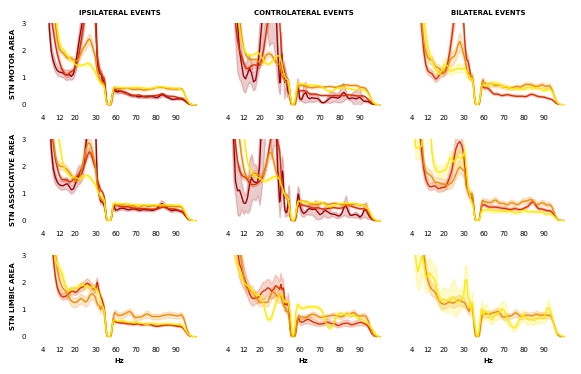

In [5]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="pre_event", filename="stn_tapping_pre_event.svg")

### 2.1.2 Event Segment

<Figure size 640x480 with 0 Axes>

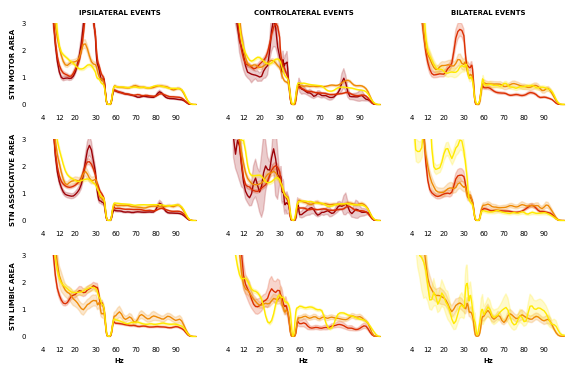

In [6]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="event", filename="stn_tapping_event.svg")

### 2.1.3 Post-Event Segment (1 Sec)

<Figure size 640x480 with 0 Axes>

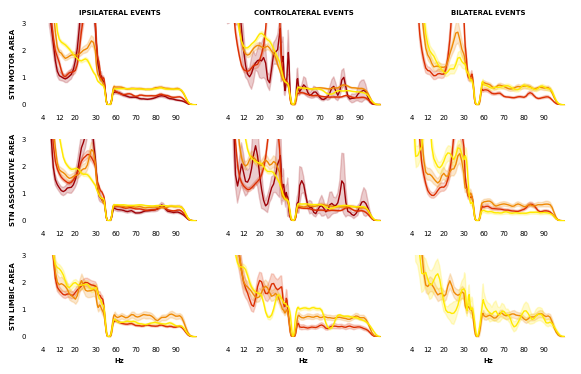

In [7]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="post_event", filename="stn_tapping_post_event.svg")

## 2.2 Involuntary Movements

### 2.2.1 Pre-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

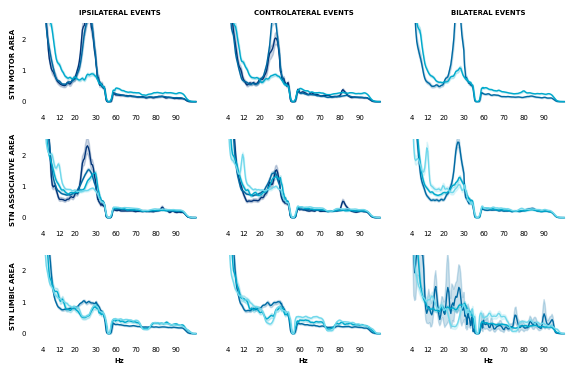

In [7]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="pre_event", 
                          filename="stn_involuntary_movement_pre_event.svg")

### 2.2.2 Event Segment

<Figure size 640x480 with 0 Axes>

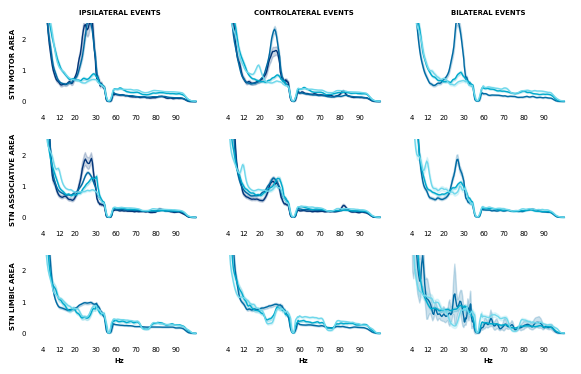

In [8]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="event", 
                          filename="stn_involuntary_movement_event.svg")

### 2.2.3 Post-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

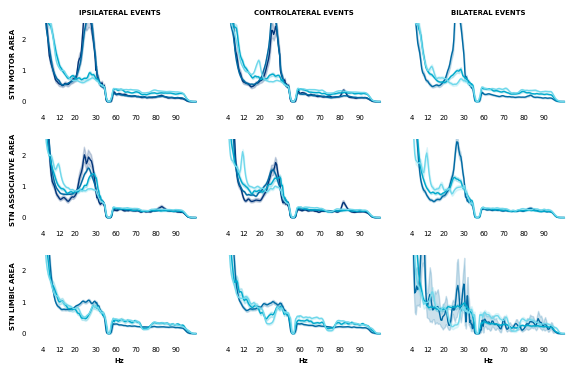

In [9]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="post_event", 
                          filename="stn_involuntary_movement_post_event.svg")

# 3 Average LFP Power Spectrum In Different STN Regions in Two Dopaminergic States

## 3.1 Tapping - Dopamine Deprived State (<30 mins)

### 3.1.1 Pre-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

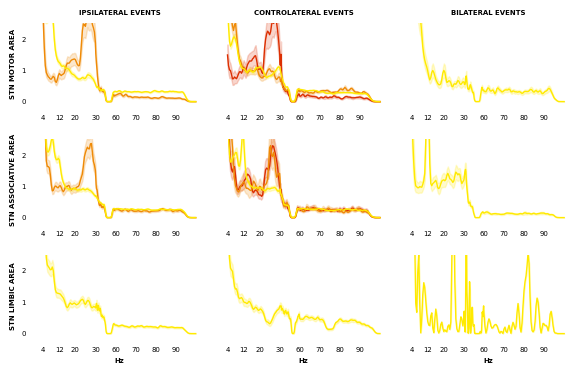

In [15]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="pre_event", dopaminergic_state="deprived",
                          filename="stn_tapping_deprived_pre_event.svg")

### 3.1.2 Event Segment

<Figure size 640x480 with 0 Axes>

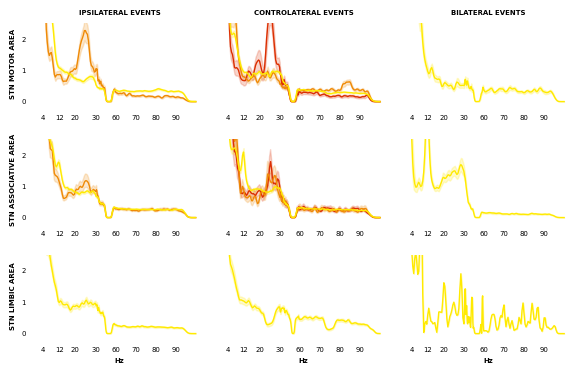

In [16]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="event", dopaminergic_state="deprived",
                          filename="stn_tapping_deprived_event.svg")

### 3.1.3 Post-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

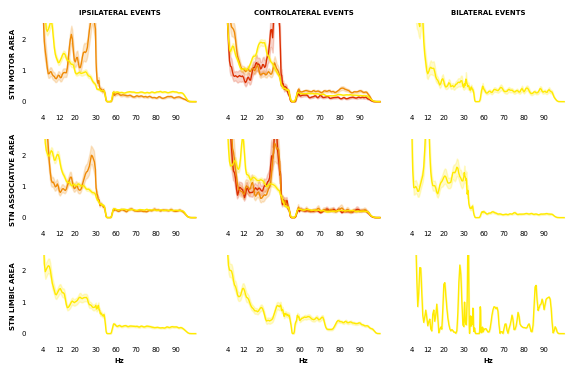

In [17]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="post_event", dopaminergic_state="deprived",
                          filename="stn_tapping_deprived_post_event.svg")

## 3.2 Tapping - Dopamine Substituted State (>=30 mins)

### 3.2.1 Pre-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

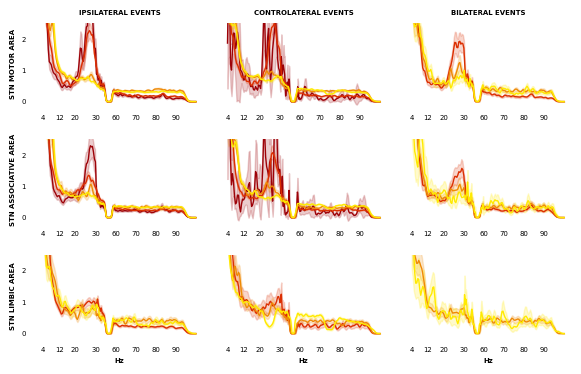

In [20]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="pre_event", dopaminergic_state="substituted",
                          filename="stn_tapping_substituted_pre_event.svg")

### 3.2.2 Event Segment

<Figure size 640x480 with 0 Axes>

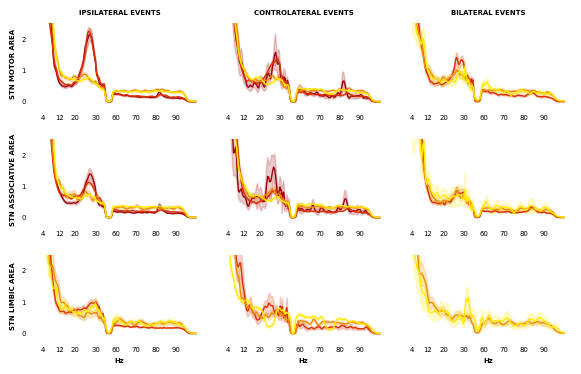

In [21]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="event", dopaminergic_state="substituted",
                          filename="stn_tapping_substituted_event.svg")

### 3.2.3 Post-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

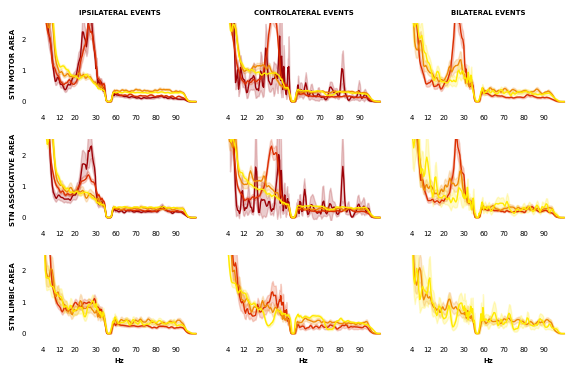

In [22]:
plot_LFP_PSD_in_STN_areas(df_TAPPING_EVENTS, event_category="tapping", segment="post_event", dopaminergic_state="substituted",
                          filename="stn_tapping_substituted_post_event.svg")

## 3.3 Involuntary Movement - Dopamine Deprived State (>=30 mins)

### 3.3.1 Pre-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

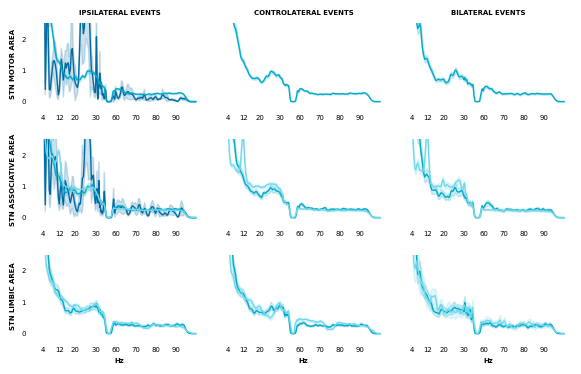

In [10]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="pre_event", dopaminergic_state="deprived",
                          filename="stn_involuntary_movement_deprived_pre_event.svg")

### 3.3.2  Event Segment

<Figure size 640x480 with 0 Axes>

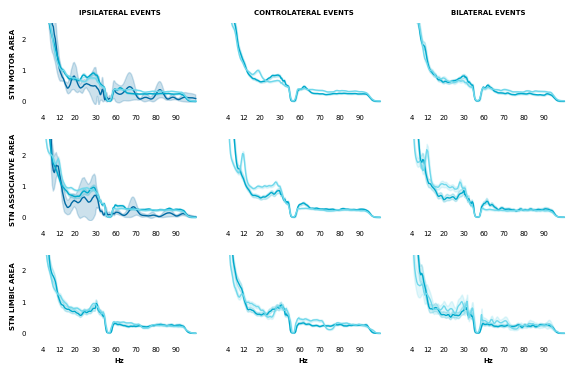

In [11]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="event", dopaminergic_state="deprived",
                          filename="stn_involuntary_movement_deprived_event.svg")

### 3.3.3 Post-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

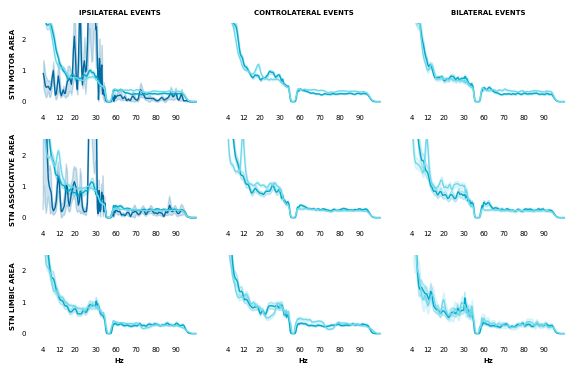

In [12]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="post_event", dopaminergic_state="deprived",
                          filename="stn_involuntary_movement_deprived_post_event.svg")

## 3.4 Involuntary Movement - Dopamine Substituted State (>=30 mins)

### 3.4.1 Pre-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

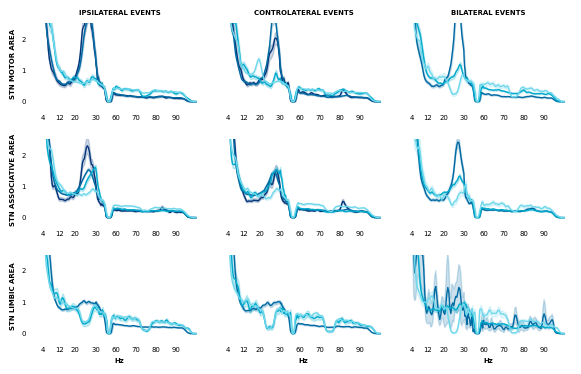

In [13]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="pre_event", dopaminergic_state="substituted",
                          filename="stn_involuntary_movement_substituted_pre_event.svg")

### 3.4.2  Event Segment

<Figure size 640x480 with 0 Axes>

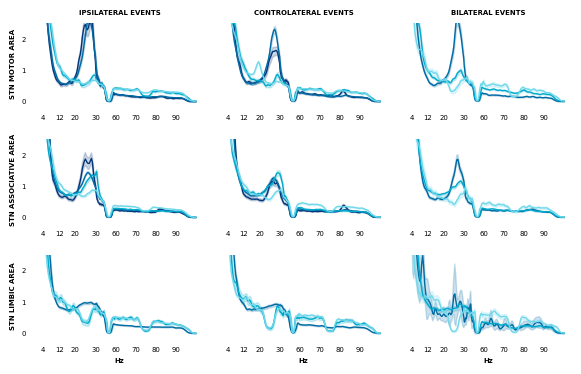

In [14]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="event", dopaminergic_state="substituted",
                          filename="stn_involuntary_movement_substituted_event.svg")

### 3.4.3 Post-Event Segment (1 sec)

<Figure size 640x480 with 0 Axes>

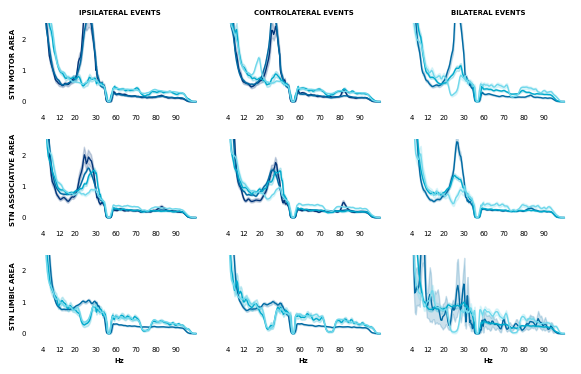

In [15]:
plot_LFP_PSD_in_STN_areas(df_INVOLUNTARY_MOVEMENT_EVENTS, event_category="involuntary_movement", segment="post_event", dopaminergic_state="substituted",
                          filename="stn_involuntary_movement_substituted_post_event.svg")